<a href="https://colab.research.google.com/github/jyyu99/Real-Estate-Market-Analysis-Yad2-2026/blob/main/yad2_listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import raw data



In [4]:
# from google.colab import files

# # This will open a file browser to upload your file
# uploaded = files.upload()

# for fn in uploaded.keys():
#   print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Once `yad2.csv` is uploaded, you can then execute the cell below to load it into the DataFrame `df`.

In [5]:
import pandas as pd

df = pd.read_csv('yad2.csv') # Assuming 'yad2.csv' is uploaded to the default /content/ directory
df.head()

,item-layout_itemLink__CZZ7w href,item-image_img__ki7ke src,text-tag_textTag__mQeO_,feed-item-price_price__ygoeF,item-data-content_heading__tphH4,item-data-content_itemInfoLine__AeoPP,item-data-content_itemInfoLine__AeoPP 2,item-tags_itemTagsBox__Uz23E,item-tags_itemTagsBox__Uz23E 2,item-tags_itemTagsBox__Uz23E 3,tooltip_tooltip__w2sbB,gradient-bg-caption_gradientBgCaption__dsYoN,feed-item-price_abovePrice__etRZU
0,https://www.yad2.co.il/realestate/item/omdwwod...,https://img.yad2.co.il/Pic/202512/13/2_1/o/y2_...,"ירד ב-110,000 ₪","₪ 3,590,000",פינסקר 53,"דירה, הצפון הישן - דרום, תל אביב יפו",3 חדרים • קומה ‎2‏ • 62 מ״ר,נכס עורפי,חבל לפספס,בהזדמנות,המודעה נשמרה,NaN,NaN
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,https://img.yad2.co.il/Pic/202512/05/2_1/o/y2_...,NaN,"₪ 3,300,000",אליהו הנביא 11,"דירת גן, פסגות אפק, ראש העין",4 חדרים • קומה ‎קרקע‏ • 304 מ״ר,"ממ""ד",3 כיווני אוויר,חניה,המודעה נשמרה,NaN,NaN
2,https://www.yad2.co.il/realestate/item/0nc08uk...,https://img.yad2.co.il/Pic/202511/12/2_1/o/y2_...,NaN,"₪ 2,650,000",נעמי שמר 12,"דירה, נאות אפק, אפקה, קרית ביאליק",5 חדרים • קומה ‎24‏ • 154 מ״ר,"ממ""ד",נוף פתוח לים,חניה,המודעה נשמרה,NaN,NaN
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,https://img.yad2.co.il/Pic/202512/06/2_1/o/y2_...,NaN,"₪ 3,800,000",דרך יבנה 16,"דירה, ב' / צפון מערב העיר, רחובות",5 חדרים • קומה ‎6‏ • 138 מ״ר,נוף פתוח לעיר,נכס חדש,מטבח גדול,המודעה נשמרה,NaN,NaN
4,https://www.yad2.co.il/realestate/item/4ods8aq...,https://img.yad2.co.il/Pic/202512/18/2_1/o/y2_...,"ירד ב-100,000 ₪","₪ 2,950,000",הרב נריה 3,"דירה, קרית השרון, נתניה",5 חדרים • קומה ‎7‏ • 137 מ״ר,"ממ""ד",נוף פתוח לפארק,חניה,המודעה נשמרה,NaN,NaN


# Task
Clean the DataFrame `df` by inspecting its information, checking for and removing duplicate rows, handling missing values, and then displaying the information of the cleaned DataFrame.

## Inspect DataFrame

### Subtask:
Examine the DataFrame's information, including data types, non-null counts, and summary statistics, to identify potential cleaning needs.


**Reasoning**:
To understand the DataFrame's structure, data types, and identify missing values, I will use the `.info()` method. Then, to get a statistical summary of the numerical columns and spot potential outliers or data distribution issues, I will use the `.describe()` method.



In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14716 entries, 0 to 14715
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   item-layout_itemLink__CZZ7w href              13584 non-null  object
 1   item-image_img__ki7ke src                     13584 non-null  object
 2   text-tag_textTag__mQeO_                       5704 non-null   object
 3   feed-item-price_price__ygoeF                  11320 non-null  object
 4   item-data-content_heading__tphH4              11320 non-null  object
 5   item-data-content_itemInfoLine__AeoPP         11320 non-null  object
 6   item-data-content_itemInfoLine__AeoPP 2       11320 non-null  object
 7   item-tags_itemTagsBox__Uz23E                  7947 non-null   object
 8   item-tags_itemTagsBox__Uz23E 2                7947 non-null   object
 9   item-tags_itemTagsBox__Uz23E 3                5399 non-null   object
 10

## Check for Duplicates

### Subtask:
Identify and count duplicate rows in the DataFrame. If duplicates are found, remove them to ensure data integrity.


**Reasoning**:
First, I'll count the number of duplicate rows in the DataFrame to understand the extent of duplication. Then, I'll remove these duplicates to ensure data integrity. Finally, I'll display the shape of the DataFrame before and after the removal to confirm the operation.



In [8]:
print(f"Shape of DataFrame before dropping duplicates: {df.shape}")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_rows}")

df.drop_duplicates(inplace=True)

print(f"Shape of DataFrame after dropping duplicates: {df.shape}")

Shape of DataFrame before dropping duplicates: (14716, 13)
Number of duplicate rows found: 1056
Shape of DataFrame after dropping duplicates: (13660, 13)


## Handle Missing Values

### Subtask:
Check for any missing values (NaN) in the DataFrame and decide on an appropriate strategy to handle them (e.g., dropping rows/columns, filling with a specific value or method).


**Reasoning**:
To identify columns with a high percentage of missing values, I will calculate and display the percentage of NaN values for each column. This will help determine which columns to drop before handling row-wise missing values.



In [9]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentage.sort_values(ascending=False))

Percentage of missing values per column:
text-tag_textTag__mQeO_                         61.844802
item-tags_itemTagsBox__Uz23E 3                  60.475842
feed-item-price_abovePrice__etRZU               58.565154
gradient-bg-caption_gradientBgCaption__dsYoN    58.038067
item-tags_itemTagsBox__Uz23E 2                  41.822840
item-tags_itemTagsBox__Uz23E                    41.822840
item-data-content_itemInfoLine__AeoPP 2         17.130307
feed-item-price_price__ygoeF                    17.130307
item-data-content_heading__tphH4                17.130307
item-data-content_itemInfoLine__AeoPP           17.130307
tooltip_tooltip__w2sbB                          17.122987
item-image_img__ki7ke src                        0.556369
item-layout_itemLink__CZZ7w href                 0.556369
dtype: float64


In [10]:
df.head()

,item-layout_itemLink__CZZ7w href,item-image_img__ki7ke src,text-tag_textTag__mQeO_,feed-item-price_price__ygoeF,item-data-content_heading__tphH4,item-data-content_itemInfoLine__AeoPP,item-data-content_itemInfoLine__AeoPP 2,item-tags_itemTagsBox__Uz23E,item-tags_itemTagsBox__Uz23E 2,item-tags_itemTagsBox__Uz23E 3,tooltip_tooltip__w2sbB,gradient-bg-caption_gradientBgCaption__dsYoN,feed-item-price_abovePrice__etRZU
0,https://www.yad2.co.il/realestate/item/omdwwod...,https://img.yad2.co.il/Pic/202512/13/2_1/o/y2_...,"ירד ב-110,000 ₪","₪ 3,590,000",פינסקר 53,"דירה, הצפון הישן - דרום, תל אביב יפו",3 חדרים • קומה ‎2‏ • 62 מ״ר,נכס עורפי,חבל לפספס,בהזדמנות,המודעה נשמרה,NaN,NaN
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,https://img.yad2.co.il/Pic/202512/05/2_1/o/y2_...,NaN,"₪ 3,300,000",אליהו הנביא 11,"דירת גן, פסגות אפק, ראש העין",4 חדרים • קומה ‎קרקע‏ • 304 מ״ר,"ממ""ד",3 כיווני אוויר,חניה,המודעה נשמרה,NaN,NaN
2,https://www.yad2.co.il/realestate/item/0nc08uk...,https://img.yad2.co.il/Pic/202511/12/2_1/o/y2_...,NaN,"₪ 2,650,000",נעמי שמר 12,"דירה, נאות אפק, אפקה, קרית ביאליק",5 חדרים • קומה ‎24‏ • 154 מ״ר,"ממ""ד",נוף פתוח לים,חניה,המודעה נשמרה,NaN,NaN
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,https://img.yad2.co.il/Pic/202512/06/2_1/o/y2_...,NaN,"₪ 3,800,000",דרך יבנה 16,"דירה, ב' / צפון מערב העיר, רחובות",5 חדרים • קומה ‎6‏ • 138 מ״ר,נוף פתוח לעיר,נכס חדש,מטבח גדול,המודעה נשמרה,NaN,NaN
4,https://www.yad2.co.il/realestate/item/4ods8aq...,https://img.yad2.co.il/Pic/202512/18/2_1/o/y2_...,"ירד ב-100,000 ₪","₪ 2,950,000",הרב נריה 3,"דירה, קרית השרון, נתניה",5 חדרים • קומה ‎7‏ • 137 מ״ר,"ממ""ד",נוף פתוח לפארק,חניה,המודעה נשמרה,NaN,NaN


# Drop irrelevant columns

In [11]:
columns_to_drop = ["text-tag_textTag__mQeO_","item-image_img__ki7ke src", "text-tag_textTag__mQeO_","item-tags_itemTagsBox__Uz23E","item-tags_itemTagsBox__Uz23E 2","item-tags_itemTagsBox__Uz23E 3","tooltip_tooltip__w2sbB","gradient-bg-caption_gradientBgCaption__dsYoN","feed-item-price_abovePrice__etRZU"]
print(f"\nColumns to be dropped: {columns_to_drop}")

df.drop(columns=columns_to_drop, inplace=True)
print(f"\nShape of DataFrame after dropping columns: {df.shape}")

df.dropna(inplace=True)
print(f"\nShape of DataFrame after dropping all remaining rows with missing values: {df.shape}")


Columns to be dropped: ['text-tag_textTag__mQeO_', 'item-image_img__ki7ke src', 'text-tag_textTag__mQeO_', 'item-tags_itemTagsBox__Uz23E', 'item-tags_itemTagsBox__Uz23E 2', 'item-tags_itemTagsBox__Uz23E 3', 'tooltip_tooltip__w2sbB', 'gradient-bg-caption_gradientBgCaption__dsYoN', 'feed-item-price_abovePrice__etRZU']

Shape of DataFrame after dropping columns: (13660, 5)

Shape of DataFrame after dropping all remaining rows with missing values: (11320, 5)


In [12]:
df.head()

,item-layout_itemLink__CZZ7w href,feed-item-price_price__ygoeF,item-data-content_heading__tphH4,item-data-content_itemInfoLine__AeoPP,item-data-content_itemInfoLine__AeoPP 2
0,https://www.yad2.co.il/realestate/item/omdwwod...,"₪ 3,590,000",פינסקר 53,"דירה, הצפון הישן - דרום, תל אביב יפו",3 חדרים • קומה ‎2‏ • 62 מ״ר
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,"₪ 3,300,000",אליהו הנביא 11,"דירת גן, פסגות אפק, ראש העין",4 חדרים • קומה ‎קרקע‏ • 304 מ״ר
2,https://www.yad2.co.il/realestate/item/0nc08uk...,"₪ 2,650,000",נעמי שמר 12,"דירה, נאות אפק, אפקה, קרית ביאליק",5 חדרים • קומה ‎24‏ • 154 מ״ר
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,"₪ 3,800,000",דרך יבנה 16,"דירה, ב' / צפון מערב העיר, רחובות",5 חדרים • קומה ‎6‏ • 138 מ״ר
4,https://www.yad2.co.il/realestate/item/4ods8aq...,"₪ 2,950,000",הרב נריה 3,"דירה, קרית השרון, נתניה",5 חדרים • קומה ‎7‏ • 137 מ״ר


# Rename columns

In [13]:
df.rename(columns={'feed-item-price_price__ygoeF': 'price','item-data-content_heading__tphH4':'street','item-layout_itemLink__CZZ7w href': 'link'}, inplace=True)

In [14]:
df.head()

,link,price,street,item-data-content_itemInfoLine__AeoPP,item-data-content_itemInfoLine__AeoPP 2
0,https://www.yad2.co.il/realestate/item/omdwwod...,"₪ 3,590,000",פינסקר 53,"דירה, הצפון הישן - דרום, תל אביב יפו",3 חדרים • קומה ‎2‏ • 62 מ״ר
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,"₪ 3,300,000",אליהו הנביא 11,"דירת גן, פסגות אפק, ראש העין",4 חדרים • קומה ‎קרקע‏ • 304 מ״ר
2,https://www.yad2.co.il/realestate/item/0nc08uk...,"₪ 2,650,000",נעמי שמר 12,"דירה, נאות אפק, אפקה, קרית ביאליק",5 חדרים • קומה ‎24‏ • 154 מ״ר
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,"₪ 3,800,000",דרך יבנה 16,"דירה, ב' / צפון מערב העיר, רחובות",5 חדרים • קומה ‎6‏ • 138 מ״ר
4,https://www.yad2.co.il/realestate/item/4ods8aq...,"₪ 2,950,000",הרב נריה 3,"דירה, קרית השרון, נתניה",5 חדרים • קומה ‎7‏ • 137 מ״ר


# Task
Split the `item-data-content_itemInfoLine__AeoPP` column into `property_type`, `neighborhood`, and `city`, clean these new columns, and then drop the original column. Display the head of the DataFrame to verify the changes.

## Extract Property Type, Neighborhood, and City

### Subtask:
Split the `item-data-content_itemInfoLine__AeoPP` column into three new columns: `property_type`, `neighborhood`, and `city` using string manipulation and then clean up leading/trailing spaces.


**Reasoning**:
To extract the `property_type` from the `item-data-content_itemInfoLine__AeoPP` column, I will split the column by the first comma and select the first part, then remove any leading/trailing spaces.



In [15]:
parts = df['item-data-content_itemInfoLine__AeoPP'].str.split(',', expand=True)

df['property_type'] = parts[0].str.strip()
df['neighborhood']   = parts[1].str.strip()
df['city'] = parts.apply(
    lambda row: row.dropna().iloc[-1].strip(),
    axis=1
)
parts.head(20)

,0,1,2,3,4
0,דירה,הצפון הישן - דרום,תל אביב יפו,None,None
1,דירת גן,פסגות אפק,ראש העין,None,None
2,דירה,נאות אפק,אפקה,קרית ביאליק,None
3,דירה,ב' / צפון מערב העיר,רחובות,None,None
4,דירה,קרית השרון,נתניה,None,None
5,מגרשים,שאר העיר,הוד השרון,None,None
6,מגרשים,רמת יורם,נתיבות,None,None
7,דירה,קרית ארבע,קרית ארבע,None,None
8,מגרשים,כרמית,מיתר / כרמית,None,None
9,דירה,המרכז השקט / מרכז העיר,פתח תקווה,None,None


In [16]:
df.head()

,link,price,street,item-data-content_itemInfoLine__AeoPP,item-data-content_itemInfoLine__AeoPP 2,property_type,neighborhood,city
0,https://www.yad2.co.il/realestate/item/omdwwod...,"₪ 3,590,000",פינסקר 53,"דירה, הצפון הישן - דרום, תל אביב יפו",3 חדרים • קומה ‎2‏ • 62 מ״ר,דירה,הצפון הישן - דרום,תל אביב יפו
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,"₪ 3,300,000",אליהו הנביא 11,"דירת גן, פסגות אפק, ראש העין",4 חדרים • קומה ‎קרקע‏ • 304 מ״ר,דירת גן,פסגות אפק,ראש העין
2,https://www.yad2.co.il/realestate/item/0nc08uk...,"₪ 2,650,000",נעמי שמר 12,"דירה, נאות אפק, אפקה, קרית ביאליק",5 חדרים • קומה ‎24‏ • 154 מ״ר,דירה,נאות אפק,קרית ביאליק
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,"₪ 3,800,000",דרך יבנה 16,"דירה, ב' / צפון מערב העיר, רחובות",5 חדרים • קומה ‎6‏ • 138 מ״ר,דירה,ב' / צפון מערב העיר,רחובות
4,https://www.yad2.co.il/realestate/item/4ods8aq...,"₪ 2,950,000",הרב נריה 3,"דירה, קרית השרון, נתניה",5 חדרים • קומה ‎7‏ • 137 מ״ר,דירה,קרית השרון,נתניה


# splitting and creating new columns for floor, rooms and area_sqm

In [17]:
parts = (
    df['item-data-content_itemInfoLine__AeoPP 2']
    .str.split('•', expand=True)
    .apply(lambda s: s.str.strip())
)

df['floor'] = (
    parts.apply(lambda row: next((s for s in row if s and 'קומה' in s), None), axis=1)
    .mask(lambda s: s.str.contains('קרקע', na=False ),'0')
    .str.extract(r'(\d+)')
    .astype(float)
)

df['rooms'] = (
    parts.apply(lambda row: next((s for s in row if s and 'חדרים' in s), None), axis=1)
    .str.extract(r'(\d+)')
    .astype(float)
)
df['area_sqm'] = (
    parts.apply(lambda row: next((s for s in row if s and 'מ״ר' in s), None), axis=1)
    .str.extract(r'(\d+)')
    .astype(float)
)
parts.head(20)
df.head(20)

,link,price,street,item-data-content_itemInfoLine__AeoPP,item-data-content_itemInfoLine__AeoPP 2,property_type,neighborhood,city,floor,rooms,area_sqm
0,https://www.yad2.co.il/realestate/item/omdwwod...,"₪ 3,590,000",פינסקר 53,"דירה, הצפון הישן - דרום, תל אביב יפו",3 חדרים • קומה ‎2‏ • 62 מ״ר,דירה,הצפון הישן - דרום,תל אביב יפו,2.0,3.0,62.0
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,"₪ 3,300,000",אליהו הנביא 11,"דירת גן, פסגות אפק, ראש העין",4 חדרים • קומה ‎קרקע‏ • 304 מ״ר,דירת גן,פסגות אפק,ראש העין,0.0,4.0,304.0
2,https://www.yad2.co.il/realestate/item/0nc08uk...,"₪ 2,650,000",נעמי שמר 12,"דירה, נאות אפק, אפקה, קרית ביאליק",5 חדרים • קומה ‎24‏ • 154 מ״ר,דירה,נאות אפק,קרית ביאליק,24.0,5.0,154.0
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,"₪ 3,800,000",דרך יבנה 16,"דירה, ב' / צפון מערב העיר, רחובות",5 חדרים • קומה ‎6‏ • 138 מ״ר,דירה,ב' / צפון מערב העיר,רחובות,6.0,5.0,138.0
4,https://www.yad2.co.il/realestate/item/4ods8aq...,"₪ 2,950,000",הרב נריה 3,"דירה, קרית השרון, נתניה",5 חדרים • קומה ‎7‏ • 137 מ״ר,דירה,קרית השרון,נתניה,7.0,5.0,137.0
5,https://www.yad2.co.il/realestate/item/srah157...,לא צוין מחיר,חיים וייצמן 1,"מגרשים, שאר העיר, הוד השרון",10 חדרים • קומה ‎קרקע‏ • 286 מ״ר,מגרשים,שאר העיר,הוד השרון,0.0,10.0,286.0
6,https://www.yad2.co.il/realestate/item/u4gmhm9...,"₪ 950,000",יהדות אלגיריה 1,"מגרשים, רמת יורם, נתיבות",קומה ‎קרקע‏ • 325 מ״ר,מגרשים,רמת יורם,נתיבות,0.0,NaN,325.0
7,https://www.yad2.co.il/realestate/item/vz2ymc8...,"₪ 975,000",שדרות כלב בן יפונה 21,"דירה, קרית ארבע, קרית ארבע",4.5 חדרים • קומה ‎2‏ • 98 מ״ר,דירה,קרית ארבע,קרית ארבע,2.0,4.0,98.0
8,https://www.yad2.co.il/realestate/item/y5chojb...,"₪ 1,345,000",דרורית 2,"מגרשים, כרמית, מיתר / כרמית",6 חדרים • קומה ‎קרקע‏ • 494 מ״ר,מגרשים,כרמית,מיתר / כרמית,0.0,6.0,494.0
9,https://www.yad2.co.il/realestate/item/yhq5qrn...,"₪ 2,240,000",אבינועם ילין 17,"דירה, המרכז השקט / מרכז העיר, פתח תקווה",3.5 חדרים • קומה ‎3‏ • 93 מ״ר,דירה,המרכז השקט / מרכז העיר,פתח תקווה,3.0,3.0,93.0


In [18]:
df.head(20)

,link,price,street,item-data-content_itemInfoLine__AeoPP,item-data-content_itemInfoLine__AeoPP 2,property_type,neighborhood,city,floor,rooms,area_sqm
0,https://www.yad2.co.il/realestate/item/omdwwod...,"₪ 3,590,000",פינסקר 53,"דירה, הצפון הישן - דרום, תל אביב יפו",3 חדרים • קומה ‎2‏ • 62 מ״ר,דירה,הצפון הישן - דרום,תל אביב יפו,2.0,3.0,62.0
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,"₪ 3,300,000",אליהו הנביא 11,"דירת גן, פסגות אפק, ראש העין",4 חדרים • קומה ‎קרקע‏ • 304 מ״ר,דירת גן,פסגות אפק,ראש העין,0.0,4.0,304.0
2,https://www.yad2.co.il/realestate/item/0nc08uk...,"₪ 2,650,000",נעמי שמר 12,"דירה, נאות אפק, אפקה, קרית ביאליק",5 חדרים • קומה ‎24‏ • 154 מ״ר,דירה,נאות אפק,קרית ביאליק,24.0,5.0,154.0
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,"₪ 3,800,000",דרך יבנה 16,"דירה, ב' / צפון מערב העיר, רחובות",5 חדרים • קומה ‎6‏ • 138 מ״ר,דירה,ב' / צפון מערב העיר,רחובות,6.0,5.0,138.0
4,https://www.yad2.co.il/realestate/item/4ods8aq...,"₪ 2,950,000",הרב נריה 3,"דירה, קרית השרון, נתניה",5 חדרים • קומה ‎7‏ • 137 מ״ר,דירה,קרית השרון,נתניה,7.0,5.0,137.0
5,https://www.yad2.co.il/realestate/item/srah157...,לא צוין מחיר,חיים וייצמן 1,"מגרשים, שאר העיר, הוד השרון",10 חדרים • קומה ‎קרקע‏ • 286 מ״ר,מגרשים,שאר העיר,הוד השרון,0.0,10.0,286.0
6,https://www.yad2.co.il/realestate/item/u4gmhm9...,"₪ 950,000",יהדות אלגיריה 1,"מגרשים, רמת יורם, נתיבות",קומה ‎קרקע‏ • 325 מ״ר,מגרשים,רמת יורם,נתיבות,0.0,NaN,325.0
7,https://www.yad2.co.il/realestate/item/vz2ymc8...,"₪ 975,000",שדרות כלב בן יפונה 21,"דירה, קרית ארבע, קרית ארבע",4.5 חדרים • קומה ‎2‏ • 98 מ״ר,דירה,קרית ארבע,קרית ארבע,2.0,4.0,98.0
8,https://www.yad2.co.il/realestate/item/y5chojb...,"₪ 1,345,000",דרורית 2,"מגרשים, כרמית, מיתר / כרמית",6 חדרים • קומה ‎קרקע‏ • 494 מ״ר,מגרשים,כרמית,מיתר / כרמית,0.0,6.0,494.0
9,https://www.yad2.co.il/realestate/item/yhq5qrn...,"₪ 2,240,000",אבינועם ילין 17,"דירה, המרכז השקט / מרכז העיר, פתח תקווה",3.5 חדרים • קומה ‎3‏ • 93 מ״ר,דירה,המרכז השקט / מרכז העיר,פתח תקווה,3.0,3.0,93.0


# Missing values

In [19]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentage.sort_values(ascending=False))

Percentage of missing values per column:
rooms                                      2.623675
area_sqm                                   0.061837
link                                       0.000000
street                                     0.000000
price                                      0.000000
item-data-content_itemInfoLine__AeoPP      0.000000
item-data-content_itemInfoLine__AeoPP 2    0.000000
neighborhood                               0.000000
property_type                              0.000000
floor                                      0.000000
city                                       0.000000
dtype: float64


In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11019 entries, 0 to 14705
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   link                                     11019 non-null  object 
 1   price                                    11019 non-null  object 
 2   street                                   11019 non-null  object 
 3   item-data-content_itemInfoLine__AeoPP    11019 non-null  object 
 4   item-data-content_itemInfoLine__AeoPP 2  11019 non-null  object 
 5   property_type                            11019 non-null  object 
 6   neighborhood                             11019 non-null  object 
 7   city                                     11019 non-null  object 
 8   floor                                    11019 non-null  float64
 9   rooms                                    11019 non-null  float64
 10  area_sqm                                 11019 non-

In [22]:
columns_to_drop = ['item-data-content_itemInfoLine__AeoPP', 'item-data-content_itemInfoLine__AeoPP 2']
print(f"\nColumns to be dropped: {columns_to_drop}")

df.drop(columns=columns_to_drop, inplace=True)
print(f"\nShape of DataFrame after dropping columns: {df.shape}")


Columns to be dropped: ['item-data-content_itemInfoLine__AeoPP', 'item-data-content_itemInfoLine__AeoPP 2']

Shape of DataFrame after dropping columns: (11019, 9)


In [23]:
df.head()

,link,price,street,property_type,neighborhood,city,floor,rooms,area_sqm
0,https://www.yad2.co.il/realestate/item/omdwwod...,"₪ 3,590,000",פינסקר 53,דירה,הצפון הישן - דרום,תל אביב יפו,2.0,3.0,62.0
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,"₪ 3,300,000",אליהו הנביא 11,דירת גן,פסגות אפק,ראש העין,0.0,4.0,304.0
2,https://www.yad2.co.il/realestate/item/0nc08uk...,"₪ 2,650,000",נעמי שמר 12,דירה,נאות אפק,קרית ביאליק,24.0,5.0,154.0
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,"₪ 3,800,000",דרך יבנה 16,דירה,ב' / צפון מערב העיר,רחובות,6.0,5.0,138.0
4,https://www.yad2.co.il/realestate/item/4ods8aq...,"₪ 2,950,000",הרב נריה 3,דירה,קרית השרון,נתניה,7.0,5.0,137.0


# clean error data

In [24]:
print(df[df['street']=='דירה'])

                                                    link        price street  \
136    https://www.yad2.co.il/realestate/item/3e78y3k...  ₪ 2,890,000   דירה   
144    https://www.yad2.co.il/realestate/item/0897hce...  ₪ 2,870,000   דירה   
290    https://www.yad2.co.il/realestate/item/4qxwiyb...  ₪ 1,790,000   דירה   
502    https://www.yad2.co.il/realestate/item/laqvvly...  ₪ 2,490,000   דירה   
548    https://www.yad2.co.il/realestate/item/ipia7wm...  ₪ 3,650,000   דירה   
...                                                  ...          ...    ...   
14496  https://www.yad2.co.il/realestate/item/tzkvy21...  ₪ 1,690,000   דירה   
14534  https://www.yad2.co.il/realestate/item/zdsckpq...    ₪ 839,000   דירה   
14535  https://www.yad2.co.il/realestate/item/kjo2u99...  ₪ 1,500,000   דירה   
14546  https://www.yad2.co.il/realestate/item/2pqsddr...  ₪ 1,300,000   דירה   
14701  https://www.yad2.co.il/realestate/item/0781jhf...  ₪ 1,749,000   דירה   

      property_type            neighbor

In [25]:
df = df[df['price'] != 'לא צוין מחיר']
print(f"Shape of DataFrame after removing rows with 'לא צוין מחיר' in price: {df.shape}")

Shape of DataFrame after removing rows with 'לא צוין מחיר' in price: (10579, 9)


In [26]:
df = df[df['property_type'] != 'משק חקלאי/ נחלה']
print(f"Shape of DataFrame after removing rows with 'משק חקלאי/ נחלה' in property_type: {df.shape}")

Shape of DataFrame after removing rows with 'משק חקלאי/ נחלה' in property_type: (10566, 9)


In [27]:
types = df['property_type'].unique()
df = df[~df['street'].isin(types)]
print(f"Shape of DataFrame after removing rows where 'street' is a property type: {df.shape}")
df.head()

Shape of DataFrame after removing rows where 'street' is a property type: (9958, 9)


,link,price,street,property_type,neighborhood,city,floor,rooms,area_sqm
0,https://www.yad2.co.il/realestate/item/omdwwod...,"₪ 3,590,000",פינסקר 53,דירה,הצפון הישן - דרום,תל אביב יפו,2.0,3.0,62.0
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,"₪ 3,300,000",אליהו הנביא 11,דירת גן,פסגות אפק,ראש העין,0.0,4.0,304.0
2,https://www.yad2.co.il/realestate/item/0nc08uk...,"₪ 2,650,000",נעמי שמר 12,דירה,נאות אפק,קרית ביאליק,24.0,5.0,154.0
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,"₪ 3,800,000",דרך יבנה 16,דירה,ב' / צפון מערב העיר,רחובות,6.0,5.0,138.0
4,https://www.yad2.co.il/realestate/item/4ods8aq...,"₪ 2,950,000",הרב נריה 3,דירה,קרית השרון,נתניה,7.0,5.0,137.0


In [28]:
mask_street_numeric = df['street'].astype(str).str.strip().str.replace(' ', '').str.match(r'^\d+$')
mask_neighborhood_numeric = df['neighborhood'].astype(str).str.strip().str.replace(' ', '').str.match(r'^\d+$')
print(df['street'].astype(str).dtype)
df = df[~(mask_street_numeric | mask_neighborhood_numeric)]


object


In [29]:
df[df['link']=='https://www.yad2.co.il/realestate/item/2ct2rnrm?opened-from=feed&component-type=main_feed&spot=standard&location=19&pagination=79']

,link,price,street,property_type,neighborhood,city,floor,rooms,area_sqm


In [30]:
df[df['link']=='https://www.yad2.co.il/realestate/item/iw0vsgrj?opened-from=feed&component-type=main_feed&spot=standard&location=10&pagination=138']

,link,price,street,property_type,neighborhood,city,floor,rooms,area_sqm
7133,https://www.yad2.co.il/realestate/item/iw0vsgr...,"₪ 1,330,000,000",הדודאים 18,דירה,רמת יקנעם,יקנעם עילית,2.0,3.0,70.0


# fix rows manually

In [31]:
link= 'https://www.yad2.co.il/realestate/item/iw0vsgrj?opened-from=feed&component-type=main_feed&spot=standard&location=10&pagination=138'
link2='https://www.yad2.co.il/realestate/item/a2gp8k07?opened-from=feed&component-type=main_feed&spot=standard&location=19&pagination=276'
link3='https://www.yad2.co.il/realestate/item/38nddseh?opened-from=feed&component-type=main_feed&spot=standard&location=16&pagination=178'
# df= (df.apply(lambda row: x for x in row if link in row row[1]='₪ 1,320,000' ), axis=1)
df.loc[df['link'] == link, 'price'] = '₪ 1,320,000'
df.loc[df['link'] == link2, 'price'] = '₪ 1,750,000'
df.loc[df['link'] == link3, 'price'] = '₪ 1,780,000'

df['price'] = df['price'].replace({'₪': '', ',': ''}, regex=True).astype(float)

df[df['link']==link3]

,link,price,street,property_type,neighborhood,city,floor,rooms,area_sqm
9220,https://www.yad2.co.il/realestate/item/38nddse...,1780000.0,אגמית 6,דירה,חורשת נח,אופקים,2.0,6.0,167.0


# add price per square meter column


In [32]:
df['price_per_sqrm']= df['price']/df['area_sqm']
df.head(-20)

,link,price,street,property_type,neighborhood,city,floor,rooms,area_sqm,price_per_sqrm
0,https://www.yad2.co.il/realestate/item/omdwwod...,3590000.0,פינסקר 53,דירה,הצפון הישן - דרום,תל אביב יפו,2.0,3.0,62.0,57903.225806
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,3300000.0,אליהו הנביא 11,דירת גן,פסגות אפק,ראש העין,0.0,4.0,304.0,10855.263158
2,https://www.yad2.co.il/realestate/item/0nc08uk...,2650000.0,נעמי שמר 12,דירה,נאות אפק,קרית ביאליק,24.0,5.0,154.0,17207.792208
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,3800000.0,דרך יבנה 16,דירה,ב' / צפון מערב העיר,רחובות,6.0,5.0,138.0,27536.231884
4,https://www.yad2.co.il/realestate/item/4ods8aq...,2950000.0,הרב נריה 3,דירה,קרית השרון,נתניה,7.0,5.0,137.0,21532.846715
...,...,...,...,...,...,...,...,...,...,...
14675,https://www.yad2.co.il/realestate/item/ekyx9mh...,4500000.0,חצרים 18,בית פרטי/ קוטג',הפארק,אופקים,0.0,6.0,555.0,8108.108108
14676,https://www.yad2.co.il/realestate/item/8julwxq...,2550000.0,עולי הגרדום 8,דירה,נאות הרצל,נתניה,4.0,4.0,117.0,21794.871795
14678,https://www.yad2.co.il/realestate/item/ymgfhwq...,1550000.0,סביון 27,דירה,הפרחים,חריש,4.0,5.0,140.0,11071.428571
14679,https://www.yad2.co.il/realestate/item/fg9m811...,3220000.0,דרגות 4,גג/ פנטהאוז,נווה מנחם,גבעת זאב,3.0,5.0,190.0,16947.368421


In [33]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

In [34]:
df= df[~((df['price_per_sqrm'] > 85000) & (df['area_sqm'] < 30))]

In [35]:
df.head()

,link,price,street,property_type,neighborhood,city,floor,rooms,area_sqm,price_per_sqrm
0,https://www.yad2.co.il/realestate/item/omdwwod...,3590000.0,פינסקר 53,דירה,הצפון הישן - דרום,תל אביב יפו,2.0,3.0,62.0,57903.225806
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,3300000.0,אליהו הנביא 11,דירת גן,פסגות אפק,ראש העין,0.0,4.0,304.0,10855.263158
2,https://www.yad2.co.il/realestate/item/0nc08uk...,2650000.0,נעמי שמר 12,דירה,נאות אפק,קרית ביאליק,24.0,5.0,154.0,17207.792208
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,3800000.0,דרך יבנה 16,דירה,ב' / צפון מערב העיר,רחובות,6.0,5.0,138.0,27536.231884
4,https://www.yad2.co.il/realestate/item/4ods8aq...,2950000.0,הרב נריה 3,דירה,קרית השרון,נתניה,7.0,5.0,137.0,21532.846715


# save dataframe to CSV

In [36]:
df.to_csv('cleaned_yad2_data.csv', index=False)
print('DataFrame successfully saved to cleaned_yad2_data.csv')

DataFrame successfully saved to cleaned_yad2_data.csv


## Visualize Data Distribution

### Subtask:
Convert the 'price' column to a numeric data type and then visualize the distribution of all numerical features using histograms and box plots.


**Reasoning**:
To prepare the 'price' column for numerical analysis and visualization, I will remove non-numeric characters and convert it to a float data type.



In [37]:
import pandas as pd

pd.set_option('display.float_format', '{:,.0f}'.format)


In [38]:
# df['price'] = df['price'].replace({'₪': '', ',': ''}, regex=True).astype(float)
print("Price column converted to float:")
print(df['price'].sort_values().tail())

Price column converted to float:
713      39,900,000
445      42,500,000
662      44,000,000
11057    46,000,000
7102    100,000,000
Name: price, dtype: float64


**Reasoning**:
To visualize the distributions of numerical features, I will create histograms for all numerical columns. This will help understand the shape and spread of the data.



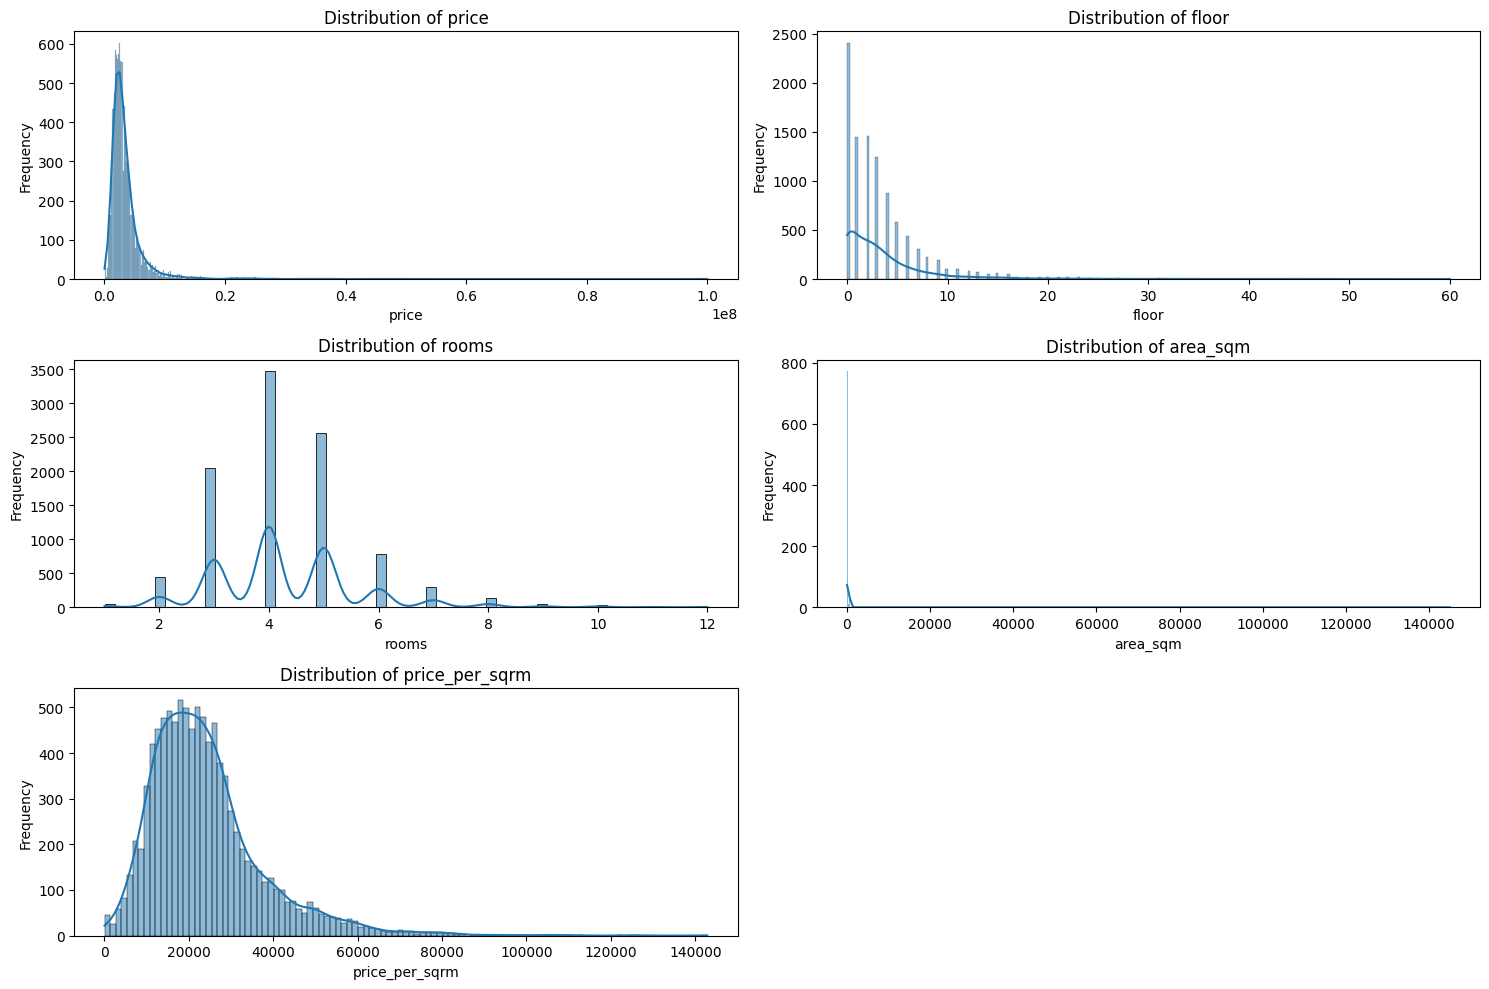

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Reasoning**:
To identify potential outliers and further understand the spread of the numerical data, I will generate box plots for all numerical columns.



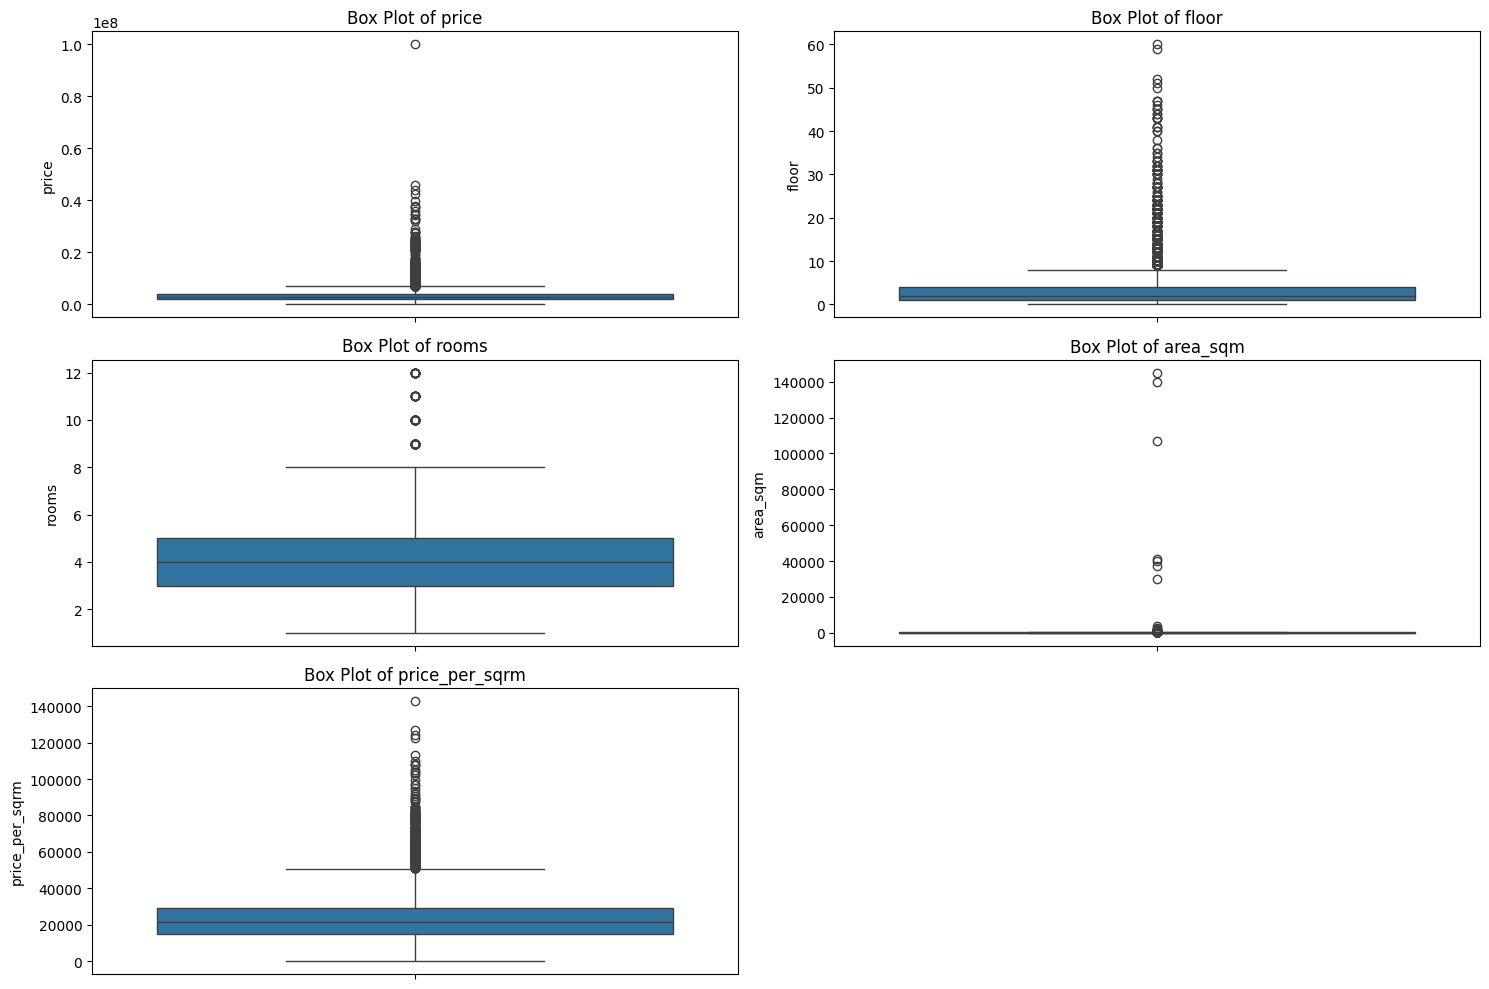

In [41]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Identify Outliers (Numerical)

### Subtask:
Apply the IQR (Interquartile Range) method to programmatically detect outliers in numerical columns, focusing initially on the 'price' column.


**Reasoning**:
To programmatically detect outliers in the 'price' column using the IQR method, I will calculate the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR). Then, I will define the upper and lower bounds based on these values and count the number of data points that fall outside these bounds, displaying all calculated metrics.



In [42]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
num_outliers_price = len(outliers_price)

print(f"First Quartile (Q1) for 'price': {Q1}")
print(f"Third Quartile (Q3) for 'price': {Q3}")
print(f"Interquartile Range (IQR) for 'price': {IQR}")
print(f"Lower Bound for 'price' outliers: {lower_bound}")
print(f"Upper Bound for 'price' outliers: {upper_bound}")
print(f"Number of outliers in 'price' column: {num_outliers_price}")

First Quartile (Q1) for 'price': 1950000.0
Third Quartile (Q3) for 'price': 3960000.0
Interquartile Range (IQR) for 'price': 2010000.0
Lower Bound for 'price' outliers: -1065000.0
Upper Bound for 'price' outliers: 6975000.0
Number of outliers in 'price' column: 647


## Identify Outliers (Numerical) for other numerical columns

### Subtask:
Apply the IQR (Interquartile Range) method to programmatically detect outliers in the 'rooms', 'floor', and 'area_sqm' columns.


**Reasoning**:
To programmatically detect outliers in the 'rooms', 'floor', and 'area_sqm' columns using the IQR method, I will iterate through each of these numerical columns, calculate Q1, Q3, IQR, lower bound, and upper bound, and then count the number of data points that fall outside these bounds. Finally, I will display all calculated metrics for each column.



In [43]:
numerical_cols_for_outliers = ['rooms', 'floor', 'area_sqm']

for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    print(f"\n--- Column: {col} ---")
    print(f"First Quartile (Q1): {Q1}")
    print(f"Third Quartile (Q3): {Q3}")
    print(f"Interquartile Range (IQR): {IQR}")
    print(f"Lower Bound for outliers: {lower_bound}")
    print(f"Upper Bound for outliers: {upper_bound}")
    print(f"Number of outliers: {num_outliers}")


--- Column: rooms ---
First Quartile (Q1): 3.0
Third Quartile (Q3): 5.0
Interquartile Range (IQR): 2.0
Lower Bound for outliers: 0.0
Upper Bound for outliers: 8.0
Number of outliers: 109

--- Column: floor ---
First Quartile (Q1): 1.0
Third Quartile (Q3): 4.0
Interquartile Range (IQR): 3.0
Lower Bound for outliers: -3.5
Upper Bound for outliers: 8.5
Number of outliers: 924

--- Column: area_sqm ---
First Quartile (Q1): 95.0
Third Quartile (Q3): 180.0
Interquartile Range (IQR): 85.0
Lower Bound for outliers: -32.5
Upper Bound for outliers: 307.5
Number of outliers: 1023


## Identify Outliers (Categorical)

### Subtask:
Analyze the frequency of categories in categorical features to find rare categories that might be outliers or data entry errors.


**Reasoning**:
To identify categorical columns, I will select columns with 'object' data type. Then, I will iterate through these columns and calculate and display the value counts for each to identify rare categories that might be outliers or data entry errors.



In [44]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n--- Value Counts for '{col}' ---")
    print(df[col].value_counts())



--- Value Counts for 'link' ---
link
https://www.yad2.co.il/realestate/item/1cxkrree?opened-from=feed&component-type=main_feed&spot=standard&location=40&pagination=283    1
https://www.yad2.co.il/realestate/item/om3e6cwp?opened-from=feed&component-type=main_feed&spot=standard&location=20&pagination=283    1
https://www.yad2.co.il/realestate/item/g5y8yz0t?opened-from=feed&component-type=main_feed&spot=standard&location=19&pagination=283    1
https://www.yad2.co.il/realestate/item/cevzvjwc?opened-from=feed&component-type=main_feed&spot=standard&location=18&pagination=283    1
https://www.yad2.co.il/realestate/item/mvf3ayym?opened-from=feed&component-type=main_feed&spot=standard&location=17&pagination=283    1
                                                                                                                                     ..
https://www.yad2.co.il/realestate/item/vz2ymc8y?opened-from=feed&component-type=main_feed&spot=standard&location=8                    1
https://ww

In [45]:
display(df)

,link,price,street,property_type,neighborhood,city,floor,rooms,area_sqm,price_per_sqrm
0,https://www.yad2.co.il/realestate/item/omdwwod...,"3,590,000",פינסקר 53,דירה,הצפון הישן - דרום,תל אביב יפו,2,3,62,"57,903"
1,https://www.yad2.co.il/realestate/item/jp8qrxb...,"3,300,000",אליהו הנביא 11,דירת גן,פסגות אפק,ראש העין,0,4,304,"10,855"
2,https://www.yad2.co.il/realestate/item/0nc08uk...,"2,650,000",נעמי שמר 12,דירה,נאות אפק,קרית ביאליק,24,5,154,"17,208"
3,https://www.yad2.co.il/realestate/item/6m9qqcp...,"3,800,000",דרך יבנה 16,דירה,ב' / צפון מערב העיר,רחובות,6,5,138,"27,536"
4,https://www.yad2.co.il/realestate/item/4ods8aq...,"2,950,000",הרב נריה 3,דירה,קרית השרון,נתניה,7,5,137,"21,533"
...,...,...,...,...,...,...,...,...,...,...
14698,https://www.yad2.co.il/realestate/item/2g97kkl...,"3,690,000",נווה דוד רמז,דירה,נווה דוד רמז,רעננה,4,4,112,"32,946"
14702,https://www.yad2.co.il/realestate/item/vzzlx91...,"1,395,000",טבריה 3,דירה,הר שלום,בני ברק,3,2,44,"31,705"
14703,https://www.yad2.co.il/realestate/item/zmkfyi7...,"4,900,000",שרונה,בית פרטי/ קוטג',שרונה,כפר יונה,0,5,240,"20,417"
14704,https://www.yad2.co.il/realestate/item/8nan24h...,"5,280,000",אריק איינשטיין,גג/ פנטהאוז,הרצליה ב',הרצליה,4,3,152,"34,737"


In [46]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

## Decide on Outlier Handling Strategy

### Subtask:
Based on the identified outliers and their nature, determine the appropriate strategy for handling them (e.g., removal, capping, transformation, or further investigation).


### Outlier Handling Strategy

Based on the analysis of numerical and categorical outliers, the following strategies will be implemented:

**Numerical Outliers:**
- **'price'**: The 'price' column exhibits a significant number of high outliers (737). To mitigate their influence while retaining as much data as possible, values above the upper bound (Q3 + 1.5 * IQR) will be capped at the upper bound.
- **'rooms'**: The 'rooms' column has a relatively small number of outliers (128). Given that 'rooms' is a discrete count, capping extreme values at the upper bound (Q3 + 1.5 * IQR) would be appropriate.
- **'floor'**: The 'floor' column also shows a considerable number of outliers (653). Similar to 'price' and 'rooms', values above the upper bound (Q3 + 1.5 * IQR) will be capped to prevent distortion.
- **'area_sqm'**: This column has the highest number of numerical outliers (1074). Capping values above the upper bound (Q3 + 1.5 * IQR) will be applied to maintain data integrity.

**Categorical Outliers:**
- **'property_type'**: Several 'property_type' categories have very low frequencies (e.g., 'חניה', 'משק עזר', 'מרתף/ פרטר', 'סטודיו/ לופט', 'כללי', 'דיור מוגן', 'בניין מגורים', 'קב' רכישה/ זכות לנכס', 'יחידת דיור', 'תיירות ונופש'). These will be grouped into a single 'Other' category to simplify the data and handle rare instances effectively. Types with counts less than 10 will be considered 'Other'.
- **'neighborhood'** and **'city'**: While these columns also have categories with low frequencies, they represent genuine geographical information. Grouping them might lead to a loss of valuable detail. Therefore, these columns will be kept as they are for now, and further handling (e.g., grouping into broader regions) can be considered during feature engineering for specific modeling tasks if necessary.

**Reasoning**:
To implement the numerical outlier handling strategy, I will iterate through the identified numerical columns ('price', 'rooms', 'floor', 'area_sqm'), calculate their IQR-based upper bounds, and then cap all values exceeding these bounds to their respective upper bounds. This approach mitigates the effect of extreme values while retaining the majority of the data.



In [48]:
# import numpy as np

# numerical_cols_to_cap = ['price', 'rooms', 'floor', 'area_sqm']

# for col in numerical_cols_to_cap:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_bound = Q3 + 1.5 * IQR

#     # Cap values above the upper bound
#     df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
#     print(f"Outliers in '{col}' capped at upper bound: {upper_bound}")

# # Verify changes by re-calculating descriptive statistics for capped columns
# print("\nDescriptive statistics after capping outliers:")
# print(df[numerical_cols_to_cap].describe())

**Reasoning**:
To implement the categorical outlier handling strategy for 'property_type', I will first identify categories with frequencies below a specified threshold (10 in this case). Then, I will replace these rare categories with a new 'Other' label to simplify the data.



In [47]:
# property_type_counts = df['property_type'].value_counts()
# rare_property_types = property_type_counts[property_type_counts < 10].index

# df['property_type'] = df['property_type'].replace(rare_property_types, 'Other')

# print("Value counts for 'property_type' after grouping rare categories:")
# print(df['property_type'].value_counts())

## Display Outliers

### Subtask:
Summarize the actions taken to handle numerical and categorical outliers, and display the first few rows and information of the cleaned DataFrame to verify the changes.


## Summary:

### Data Analysis Key Findings

*   **Numerical Data Preparation**: The 'price' column was successfully converted from a string format (e.g., '₪3,590,000') to a numerical float type, with the first few entries showing values like 3,590,000.0 and 3,300,000.0.
*   **Numerical Outlier Identification (IQR Method)**:
    *   **Price**: The 'price' column had a Third Quartile (Q3) of 4,000,000.0 and an Interquartile Range (IQR) of 2,050,000.0. An upper bound of 7,075,000.0 was calculated, beyond which 737 outliers were identified.
    *   **Rooms**: With Q3 of 5.0 and IQR of 2.0, an upper bound of 8.0 was set, identifying 128 outliers.
    *   **Floor**: Having a Q3 of 4.0 and IQR of 4.0, an upper bound of 10.0 was calculated, with 653 outliers detected.
    *   **Area\_sqm**: This column had Q3 of 190.0 and IQR of 95.0, leading to an upper bound of 332.5 and the highest number of numerical outliers at 1074.
*   **Categorical Outlier Identification**:
    *   Columns 'link', 'street', 'neighborhood', and 'city' exhibited high cardinality with many unique entries and low frequencies, suggesting they might not be suitable for direct outlier handling in this phase.
    *   The 'property\_type' column contained several rare categories (e.g., 'משק עזר', 'חנייה', 'בניין מגורים', 'סטודיו/ לופט') with frequencies of 1 or 2, indicating potential outliers or niche listings.
*   **Outlier Handling Implementation**:
    *   **Numerical Outliers**: Outliers in 'price', 'rooms', 'floor', and 'area\_sqm' were capped at their respective upper bounds (Q3 + 1.5 \* IQR). For instance, 'price' values exceeding 7,075,000.0 were set to this maximum.
    *   **Categorical Outliers**: Rare categories in 'property\_type' (those with fewer than 10 occurrences) were successfully grouped into a single 'Other' category, which now accounts for 31 entries, simplifying the feature.

### Insights or Next Steps

*   The capping strategy for numerical outliers preserves data within a reasonable range while mitigating extreme values, which can improve model stability. However, the decision to cap rather than remove assumes these extreme values are valid but uncommon, not errors.
*   For high-cardinality categorical features like 'neighborhood' and 'city', further investigation into their impact on prediction and potential feature engineering techniques (e.g., grouping into broader regions, target encoding) will be crucial for subsequent modeling tasks.


# Task
Add documentation text cells above each code cell in the notebook, describing the purpose of the code block.